In [ ]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/i345144/OneDrive - SAP SE/Documents/MSRUS/Indivisual_Project/FakeNewsV2/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# LOADING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


Using TensorFlow backend.
C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np

# IMPORTING THE DATASET

In [4]:
import os
os.chdir("C:\\Users\\i345144\\OneDrive - SAP SE\\Documents\\MSRUS\\Indivisual_Project\\FakeNewsV2\\Data")
true = pd.read_csv("FakeNews_ref_data_Real.csv")
false = pd.read_csv("FakeNews_reference_data_Fake.csv")

# DATA VISUALIZATION AND PREPROCESSING

In [5]:
true.head()

,text,lables
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [6]:
false.head()

,text,labels
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [7]:
true['category'] = 1
false['category'] = 0

In [8]:
df = pd.concat([true,false]) #Merging the 2 datasets

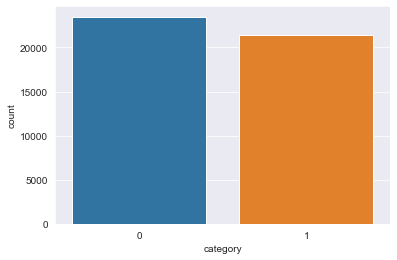

In [9]:
sns.set_style("darkgrid")
sns.countplot(df.category)

**WE CAN SEE THAT THE DATASET IS BALANCED**

In [10]:
df.head()

,text,lables,category,labels
0,WASHINGTON (Reuters) - The head of a conservat...,0.0,1,NaN
1,WASHINGTON (Reuters) - Transgender people will...,0.0,1,NaN
2,WASHINGTON (Reuters) - The special counsel inv...,0.0,1,NaN
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0.0,1,NaN
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0.0,1,NaN


In [11]:
df.isna().sum() # Checking for nan Values

text            5
lables      23485
category        0
labels      21417
dtype: int64

In [13]:
df.text.count()

44897

In [14]:
df.category.value_counts()

0    23485
1    21417
Name: category, dtype: int64

**MERGING ALL THE TEXT DATA INTO 1 COLUMN i.e. 'text'**

In [15]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "text", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, 'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€\x9d on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€\x9d drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€\x9d spend

C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a

Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not h

Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not h

Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyp

Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a

Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for

Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a

Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyp

Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not h

Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyp

Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyp

Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyp

Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x9d' [U+9d], substituting with a dummy symbol.
Font 'rm' does not have a glyp

ValueError: 
1.2 billion Raytheon Co  Patriot air defense missile system, as interest in missile defense systems strengthens amid heightened regional tensions and ballistic missile technology improves globally.  The Swedish government said on Tuesday negotiations with the U.S. company will target delivery beginning in 2020, and for the system to be operational by 2025 at the latest. Iran, North Korea and Russia, among others, have made advancements in their missile technology.  Raytheon said,  Sweden s announcement brings them closer to joining the growing group of European nations depending on the combat-proven Patriot to defend against ballistic and cruise missiles, and advanced aircraft and drones.  The Swedish government said,  based on this tender and the decision of the Riksdag (the Swedish Parliament) on the proposal to acquire a new medium-range air defense system in the 2018 budget bill, the government will make a final decision on the acquisition during 2018.  Lockheed Martin Corp, the Pentagon s No. 1 weapons supplier, said in August its customers want to defend themselves against possible incoming missile attacks and are increasingly asking about missile defense systems. Raytheon has built more than 220 Patriot fire units and delivered them to customers in 13 nations including The Netherlands and Germany.    The Swedish Defense Materiel Administration (FMV) has been authorized to send a L\letter of request to the United States, and to enter into negotiations for procurement of the Patriot system. The contract value is estimated to exceed 10 billion Swedish crowns (
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  ^
Unknown symbol: \letter, found '\'  (at char 1410), (line:1, col:1411)

<Figure size 864x576 with 1 Axes>

In [16]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

**DATA CLEANING**

In [17]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=cJZFepSvxzM" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\bs4\__ini

C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=wYdX071Nlow" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=YeDU6dCR9tA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://www.youtube.com/watch?v=0cVugq2GbBk" looks like a 

TypeError: object of type 'float' has no len()

**WORDCLOUD FOR REAL TEXT (LABEL - 1)**

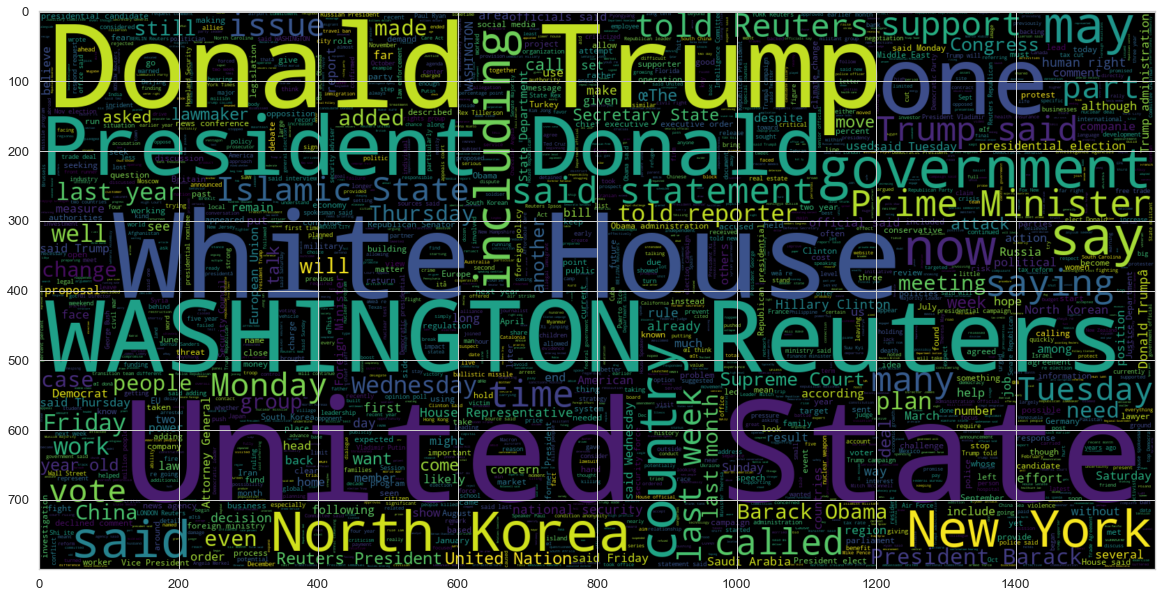

In [18]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

**WORDCLOUD FOR FAKE TEXT (LABEL - 0)**

In [20]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc1 = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc1 , interpolation = 'bilinear')

TypeError: sequence item 13350: expected str instance, float found

<Figure size 1440x1440 with 0 Axes>

**Number of characters in texts**

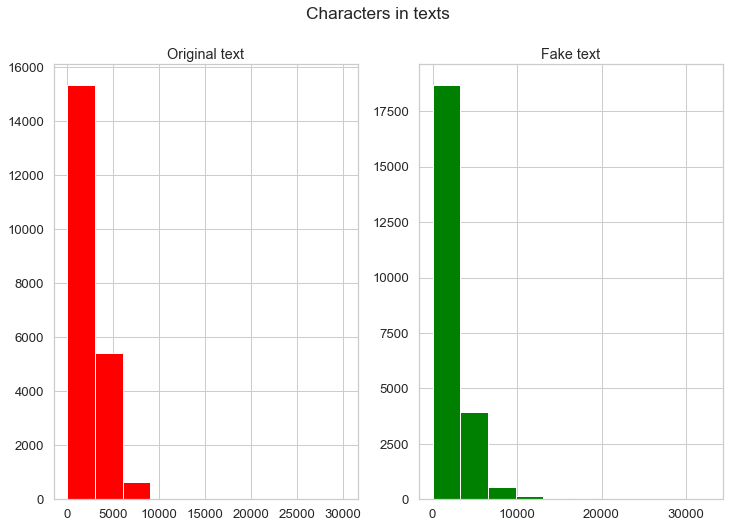

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

**The distribution of both seems to be a bit different. 2500 characters in text is the most common in original text category while around 5000 characters in text are most common in fake text category.**

**Number of words in each text**

TypeError: object of type 'float' has no len()

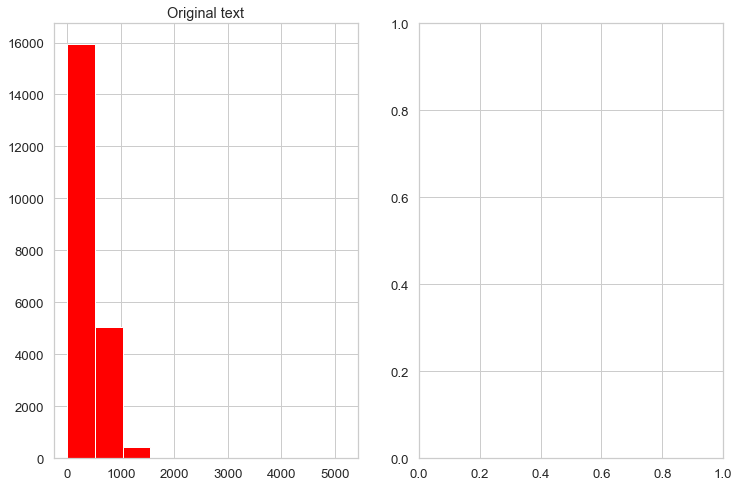

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

**Average word length in a text**

C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\i345144\AppData\Local\Continuum\anaconda3\envs\FakeNewsV2\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: 'float' object is not iterable

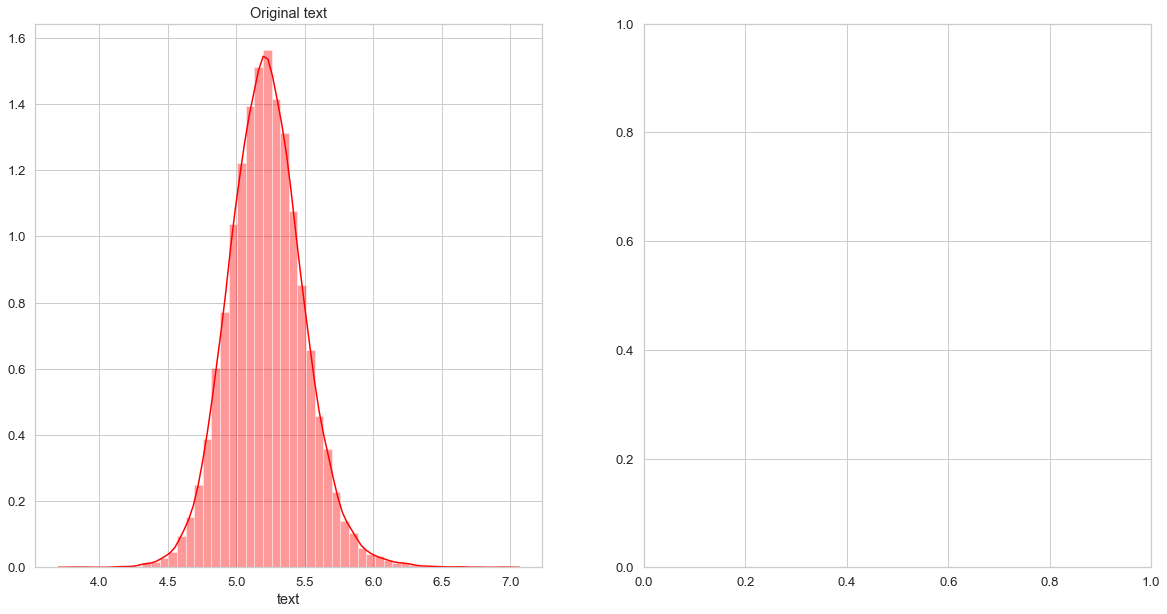

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [24]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:5]

AttributeError: 'float' object has no attribute 'split'

In [25]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

NameError: name 'corpus' is not defined

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

**Unigram Analysis**

In [27]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

ValueError: np.nan is an invalid document, expected byte or unicode string.

<Figure size 1152x648 with 0 Axes>